In [ ]:
import tensorflow as tf

# a = tf.placeholder(dtype=tf.int32, name="a")
# a = tf.constant([[1,2], [3, 4]], name = "a")
# b = tf.constant([[1],[2]], name="b")
# c = tf.matmul(a, b)
# print(a.shape, b.shape, c.shape)

# a = tf.placeholder(shape=(None, 2), dtype=tf.int32, name="a")
# b = a + a
c = tf.Variable(1, name="c")
d = tf.assign(c, c + 1)


saver = tf.train.Saver()

with tf.Session() as sess:
#     print("a + b", sess.run(c, feed_dict={a: 1}))
#     print("a * b", sess.run(c))
#     print(sess.run(a, feed_dict={a: [[1, 2]]}))
    sess.run(tf.global_variables_initializer())
    print(sess.run(d))
    saver.save(sess, "model/model.ckpt")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, save_path="model/model.ckpt")
    print(sess.run(d))

    

In [ ]:
import tensorflow as tf

LOG_DIR = "./logs"

a = tf.constant(1, name="a")
b = tf.constant(1, name="b")
c = a + b

graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)
    


In [ ]:
import tensorflow as tf

x = tf.Variable(100.0, name="x")

func = (x - 1) ** 2

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)

train_step = optimizer.minimize(func)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(40):
        sess.run(train_step)
    print("x = ", sess.run(x))
    
    



In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

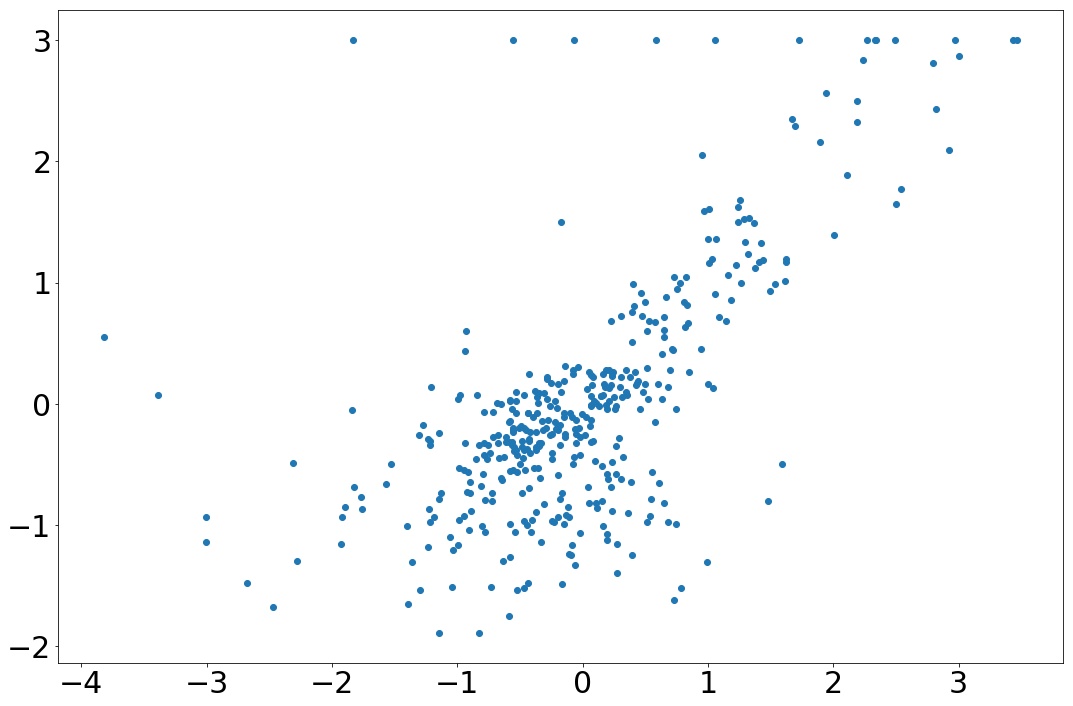

In [21]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean)/ x_train_std
y_train = (y_train - y_train_mean) / y_train_std

x_test = (x_test - x_train_mean)/ x_train_std
y_test = (y_test - y_train_mean) / y_train_std

plt.plot(x_train[:, 5], y_train, "o")



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 10*3
plt.rcParams["figure.figsize"] = [18, 12]
# plt.rcParams["font.family"] = ["IPAexGothic"]

plt.hist(y_train, bins=20)
plt.xlabel("")
plt.ylabel("")
plt.show()
plt.plot(x_train[:, 5], y_train, "o")
plt.xlabel("")
plt.ylabel("")




In [25]:
x = tf.placeholder(tf.float32, (None, 13), name="x")
y = tf.placeholder(tf.float32, (None, 1), name="y")
w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)

loss = tf.reduce_mean((y - pred) ** 2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     for step in range(100):
#         train_loss, _ = sess.run(
#             [loss, train_step],
#             feed_dict={
#                 x: x_train,
#                 y: y_train.reshape((-1, 1))
#             }
#         )
#         print("step: {}, train_loss: {}, ".format(
#             step, train_loss
#         ))
        
#     pred_ = sess.run(pred, feed_dict={x: x_test})


RuntimeError: Attempted to use a closed Session.

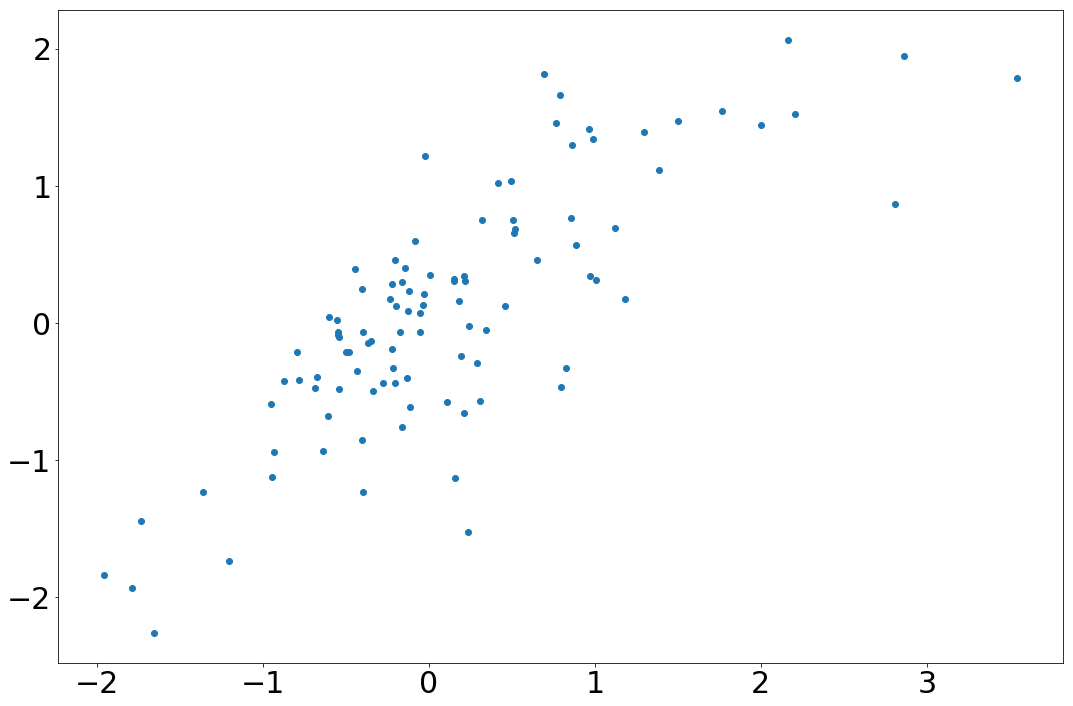

In [26]:
plt.plot(x_test[:, 5], pred_, "o")

In [24]:
import numpy as np

def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch
    
    
BATCH_SIZE = 32

step = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict={
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
            
            print(step, train_loss)
            step += 1
            
    pred_ = sess.run(pred, feed_dict={x: x_test})



0 8.87417
1 2.86203
2 3.28783
3 1.53913
4 1.50868
5 2.8792
6 1.45097
7 0.918059
8 0.659104
9 0.547271
10 0.658442
11 0.611199
12 0.553424
13 0.498982
14 0.424528
15 0.400712
16 0.5667
17 0.193472
18 0.419588
19 0.489204
20 0.456635
21 0.326613
22 0.289794
23 0.346653
24 0.206357
25 0.237312
26 0.350035
27 0.35882
28 0.369999
29 0.207949
30 0.366504
31 0.165934
32 0.164015
33 0.480278
34 0.459086
35 0.330884
36 0.421409
37 0.1866
38 0.108245
39 0.286544
40 0.315608
41 0.230385
42 0.33806
43 0.14721
44 0.117218
45 0.238158
46 0.4277
47 0.356423
48 0.236905
49 0.282828
50 0.238946
51 0.880868
52 0.61922
53 0.227531
54 0.167854
55 0.242445
56 0.292641
57 0.366792
58 0.252401
59 0.2499
60 0.394586
61 0.279159
62 0.22431
63 0.509697
64 0.290727
65 0.205628
66 0.239477
67 0.588755
68 0.253448
69 0.230424
70 0.249378
71 0.256016
72 0.295862
73 0.258016
74 0.223294
75 0.493752
76 0.163961
77 0.526075
78 0.228695
79 0.156433
80 0.38506
81 0.330944
82 0.269039
83 0.300775
84 0.154124
85 0.233835


682 0.522907
683 0.150377
684 0.242539
685 0.468486
686 0.429972
687 0.632134
688 0.314121
689 0.179592
690 0.244814
691 0.423834
692 0.223881
693 0.527089
694 0.390531
695 0.342971
696 0.183513
697 0.233291
698 0.41503
699 0.186197
700 0.151613
701 0.621172
702 0.236426
703 0.525759
704 0.222599
705 0.226538
706 0.243418
707 0.193657
708 0.258707
709 0.265823
710 0.23961
711 0.214559
712 0.209195
713 0.537561
714 0.546717
715 0.275953
716 0.240815
717 0.237994
718 0.228231
719 0.163984
720 0.264572
721 0.182335
722 0.213149
723 0.329255
724 0.208769
725 0.39566
726 0.535194
727 0.351971
728 0.313868
729 0.172968
730 0.408935
731 0.466526
732 0.233151
733 0.144101
734 0.256914
735 0.28227
736 0.230308
737 0.36864
738 0.21652
739 0.470698
740 0.288507
741 0.619929
742 0.223842
743 0.302277
744 0.372525
745 0.198929
746 0.178086
747 0.248072
748 0.221177
749 0.226026
750 0.434234
751 0.288427
752 0.175822
753 0.171053
754 0.58956
755 0.253604
756 0.144327
757 0.113626
758 0.207196
759 0.